# figure 2, the obscured pendulum 

In [11]:
import numpy as np
from scipy.integrate import odeint  
from operator import sub 
import controlpy   
import pickle

from matplotlib import  rc    
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import rcParams

import phasediagram as phd
import singlependulum as sp  
# import dynamicpendulums.figureparam as fp

from figure_settings import *   
# from figure_functions import *   
import figure_functions as ff

In [12]:
# General Plotting Parameters 
fig_dim = (3.2, 3 ) 
fig_name = 'fig2_obscured_pendulum'  
LQR_limit = 0.3

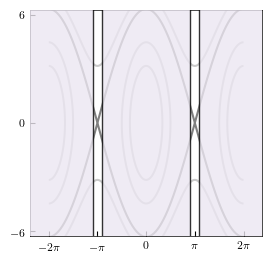

In [13]:


#     ax_p.text(-2.3,0,'Obscured Region',fontsize = 8, zorder =5)
    
              
fig_dim = (3,3)
fig, ax0 = plt.subplots(1,1,figsize =fig_dim, dpi = 100)
# call plot functions 
ff.plot_state_space(ax0, contour_col= contour_col, 
                    obscure_col=obscure_col,obscure_edge=obscure_edge,
                   obscure_alpha = obscure_alpha, homoclinic_col = homoclinic_col  )


In [14]:
def draw_pendulums_xaxis( ax_p, r = 0.3, n_pendulums = 11, color='k' ):
    angle_list = np.linspace( -np.pi, np.pi, n_pendulums )
 
    for th in angle_list:
        x  =  np.sin(th) *r
        y = -np.cos(th)*r 
        ax_p.plot( np.array([0,x]) + th ,[0,y],color=color)  
        ax_p.scatter( th+x,y,5,color=color) 

    ax_p.set_xlim( np.array([-1,1]) *np.pi*2   ) 
    ax_p.set_ylim( np.array([-1,1])*(r+0.2)  )
    ax_p.set_aspect('equal', adjustable='box' )
    ax_p.axis('off')
    
    return( ax_p ) 

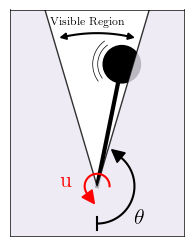

In [15]:
def draw_obscured_pendulum(ax_p): 

    # set parameters -------------------------------------------
    ax_p.set_xlim( ( np.array([-.7,.7])  ))
    ax_p.set_ylim( ( np.array([-0.4,1.42]) )) 
    ax_p.set_aspect('equal') 
    dot_scale = [50,600]  # size of pendulum bulb 
    window =  1.2 # set window size as multiple of pendulum length 
 
    circle_rad = 0.15
    # draw pendulum 
    y0 = np.array([ np.pi -0.2 , 0])  
    x_pos = np.sin(y0[0]) 
    y_pos = -np.cos(y0[0 ])
    circle1 = plt.Circle((x_pos, y_pos), circle_rad , color='k',zorder = -6) 
    ax_p.add_artist(circle1)

    ax_p.plot( [0,x_pos], [0,y_pos] , color='k',lineWidth = 3 ,zorder = -6)  

    # draw theta arrow 
    thet = np.linspace(np.pi*0,np.pi - 0.7,101)
    r = 0.3
    x = np.sin(thet)*r
    y = -np.cos(thet)*r 
    ax_p.plot(x,y,'k')
    phd.draw_arrow( x[-1],y[-1],  thet[-1]   , ax_p,0.1) 
    ax_p.plot( [0,0], [-0.35,-0.25],'k') 
    ax_p.annotate(r'$\theta$' , xy=( 0.3,-0.3),fontsize= 16)

    # draw theta arrow --------------------------------------------
    thet = np.linspace(np.pi*0.5,np.pi*1.7 ,101)
    r = 0.1
    x = np.sin(thet)*r
    y = -np.cos(thet)*r 
    ax_p.plot(x,y,'r')
    phd.draw_arrow( x[-1],y[-1],  thet[-1]   , ax_p,0.1,facecolor='r', edgecolor='r') 
    # ax_p.plot( [0,0], [-0.35,-0.25],'r') 
#     ax_p.annotate(r'$\tau$' , xy=( -0.2,0),fontsize= 16,color='r')
    ax_p.annotate(r'u' , xy=( -0.3,0),fontsize= 16,color='r')

    L1 = 1.8
    x  = np.array([-L1,-np.sin( LQR_limit)*L1, 0,np.sin( LQR_limit)*L1,L1,L1,-L1]) 
    y = np.array([L1,L1,0,L1,L1,-L1,-L1])
    ax_p.fill(x,y,zorder = 0, facecolor = obscure_col, edgecolor=obscure_edge ,  alpha = obscure_alpha ) 

    # axis adjust-------------------------------------------
    ax_p.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,      # ticks along the left edge are off
        right=False,         # ticks along the right edge are off
        labelbottom=False,         # ticks along the top edge are off
        labelleft=False) # labels along the bottom edge are off
    
    # draw visible arc --------------------------------------------
    thet = np.linspace(np.pi-0.2 ,np.pi+0.2  ,101)
    r = 1.23
    x = np.sin(thet)*r
    y = -np.cos(thet)*r  
    phd.draw_arrow( x[-1],y[-1],  thet[-1]   , ax_p,0.05,facecolor='k', edgecolor='k' ) 
    phd.draw_arrow( x[0],y[0],  thet[0]+np.pi  , ax_p,0.05,facecolor='k', edgecolor='k')  
    ax_p.plot(x,y,'k')
    ax_p.text(-0.38,1.29,'Visible Region',fontsize=8)
    

    # draw motion arc 
    L = 0.98
    thet = np.linspace( np.pi*1.2,np.pi*1.7   ,101) 
    rad_list  = circle_rad + np.array([0.04,0.08] ) 
    for r in rad_list: 
        x = np.sin(thet)*r
        y = -np.cos(thet)*r
        ax_p.plot(x + L*np.sin(y0[0]),y+ L*np.cos(y0[1]),'k', linewidth =0.5) 
        
          
fig_dim = (3,3)
fig, ax0 = plt.subplots(1,1,figsize =fig_dim, dpi = 100)
# call plot functions 
draw_obscured_pendulum(ax0)

In [16]:
def draw_potential(ax_p):
    angle_list = np.linspace(-1,1,101)*np.pi*2
    
    ax_p.plot( angle_list,  10*(1-np.cos(angle_list) ), 'k' ) 
    ax_p.xaxis.set_ticks([])
    ax_p.set_ylim( [-1,21])
    ax_p.axis('off')
    return(ax_p) 

In [17]:
def simulate_optimal( y0):
    # ---------controller ------------   
    dt = 0.001; 
    tLast =5
    tInt = np.arange(0,tLast+dt, dt) ;
    n_steps = np.int(tLast/dt)
    print('Number of time steps: '+ str(n_steps) )

    # load u -file 
    file_to_load = 'data\controlU_lookup_Q1_R100.npy'
    U_bang,X,Y = np.load( file_to_load )  
    print('File loaded: ' + file_to_load)

    L =1.
    g = -10.   
    time_sign =  3

    # ---time step per simulation ------
    t = np.linspace(0,dt,2)  
    y_n = np.zeros( (n_steps,2)  ) 
    Y_dat = [] 
    y_1 = y0 
    u_clip = 3

    U = np.zeros( (n_steps)  )
    for j in range(n_steps):  
        y_n[j,:] = y_1 
        closest_x =  np.argmin( np.abs(  X[0,:]-y_1[0] ) ) 
        closest_y =  np.argmin( np.abs(  Y[:,0]-y_1[1] ) ) 

        U[j] = U_bang[closest_y,closest_x]/2 

        dE= sp.compute_dE(y_1[0],y_1[1]  ) 
        if dE < -19.98:
            U[j] = 0  
        y_2 = odeint(  sp.pendulum_ode, y_1,  t, args=(U[j],time_sign,)  )[1]     # ode solver 
        y_1 = y_2   
    U_n = U 
    
    return( y_n, U_n) 

In [18]:
# # do simulations for low and high initial conditions 
# y0 = np.array([0,1]) 
# y_n, U_n = simulate_optimal(y0) 
# y_n[0,:] = sp.wrap2periodic(y_n[0,:]) 

# y0 = np.array([-1.8*np.pi,8]) 
# y_p, U_p = simulate_optimal( y0) 

In [19]:
def plot_optimal_control( ax_p, traject_col = 'g', control_col='m'): 
    ax_p.set_ylim([-9,9])   
    ax_p.set_xlim([-2*np.pi,2*np.pi])

    file_to_load = 'data\controlU_lookup_Q1_R100.npy'
    U_bang,X,Y = np.load( file_to_load )   
    
    # plot background 
    pcol = ax_p.pcolor(X,Y,U_bang, cmap= contr ) 
    ax_p.pcolor(X-2*np.pi,Y,U_bang, cmap= contr ) 
    ax_p.pcolor(X+2*np.pi,Y,U_bang, cmap= contr )  
    
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes 
    axins = inset_axes(ax_p,
                       width="5%",  # width = 5% of parent_bbox width
                       height="50%",  # height : 50%
                       loc='lower left',
                       bbox_to_anchor=(1.05, 0.45, 1, 1),
                       bbox_transform=ax_p.transAxes,
                       borderpad=0,
                       ) 

    cbar = fig.colorbar(pcol, cax=axins , ticks=[-4,0,4] )
    cbar.ax.set_yticklabels([-3,0,3])  # vertically oriented colorbar
    cbar.ax.set_title('Control U')   
    
    # plot energy contours 
    plot_add_contours(ax_p ) 

    # plot homoclinic orbit 
    phd.homoclinic_plot(ax_p  ,-2*np.pi,2*np.pi) 

    # plot negative line    
    plot_discontinuous_lines(ax_p, y_n,linewidth =1, color=traject_col)
    u_bool = np.abs(U_n)>0.1 
    y_data = y_n[u_bool] 
    plot_discontinuous_lines(ax_p, y_data, color= control_col)

    # plot positive line
    ax_p.plot( y_p[:,0], y_p[:,1] ,linewidth =1, color=traject_col)
    u_bool = np.abs(U_p)>0.1 
    y_data = y_p[u_bool]     
    plot_discontinuous_lines(ax_p, y_data, color=control_col)

    # change x-ticks 
    ax_p.xaxis.set_major_locator(plt.MultipleLocator(np.pi )) 
    ax_p.xaxis.set_major_formatter(plt.FuncFormatter(phd.multiple_formatter())) 
    
    return( ax_p) 

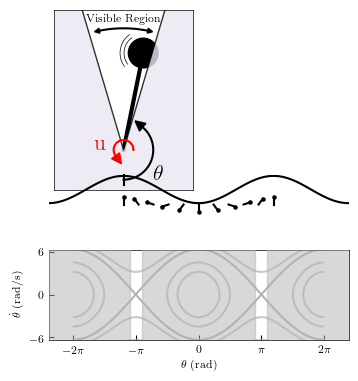

In [20]:
# fig_dim = (3.2,3)
fig = plt.figure( figsize= fig_dim,dpi = 100)

# h = 1
# dx1 = 0.2
# dx2= 0.2 
# dx3= 0.4 
# dw = 0.08
# ax0= plt.axes([ 0 , 0 , dx1 ,  h] )  
# ax1= plt.axes([ dx1+dw ,0 , dx2, h])  # standard axes 
# ax2= plt.axes([ dx1+dw+dx2+dw ,0 , dx3 ,  h] )  
# ax2= plt.axes([ dx1+dw+dx2+dw ,0 , dx3 ,  h] )  

l = 1

ax3= plt.axes([ 0 , 0.5 , 0.5,  0.6] )  
ax2= plt.axes([ 0 , 0.45 , l  ,  0.1] )  
ax0= plt.axes([ 0 , 0.4 , l  ,  0.1] )  
ax1= plt.axes([ 0 , 0 , l  ,  0.3] )  
  
# fig, (ax0,ax1,ax2,ax3) = plt.subplots(4,1,figsize =fig_dim, dpi = 100)
# call plot functions 
draw_obscured_pendulum(ax3)

ff.plot_state_space(ax1 )   
ax1.set_xlabel(r'$\theta$ (rad)' )
ax1.set_ylabel(r'$\dot{\theta}$ (rad/s)')
draw_pendulums_xaxis(ax0)

draw_potential(ax2)  
 

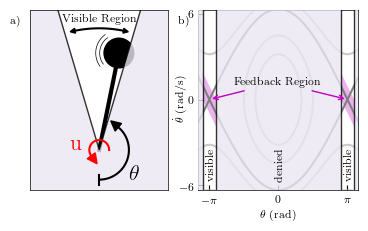

In [22]:
fig_dim = (3.2,3)
fig = plt.figure( figsize= fig_dim,dpi = 100)

h = .6
dx1 = 0.5
dx2= 0.5
dw = 0.06
ax0= plt.axes([ 0 , 0 , dx1 ,  h] )  
ax1= plt.axes([ dx1+dw ,0 , dx2, h])  # standard axes 
# ax2= plt.axes([ dx1+dw+dx2+dw ,0 , dx3 ,  h] )   

draw_obscured_pendulum(ax0 )

ff.plot_state_space(ax1, contour_col= contour_col, 
                    obscure_col=obscure_col,obscure_edge=obscure_edge,
                   obscure_alpha = obscure_alpha, homoclinic_col = homoclinic_col  )   

yl =  -4
ax1.text( -np.pi-0.2 ,yl,'visible',rotation = 90 , fontsize = 8) 
ax1.text( -.2 ,yl ,'denied',rotation = 90 , fontsize = 8 ,zorder  = 8)
ax1.text( np.pi-0.2,yl,'visible' ,rotation = 90 , fontsize = 8) 
  
ax1.set_xlim([-np.pi-0.5,np.pi+0.5])

ax1.set_xlabel(r'$\theta$ (rad)' )
ax1.set_ylabel(r'$\dot{\theta}$ (rad/s)',   va = 'top',)  

label_dict = dict( fontsize =8 , fontweight='bold' )   
# ff.label_axes(fig,labels =['a)','b)'], loc=(-0.15,0.95 ) , **label_dict  )
ff.label_axes2(fig,labels =['a)','b)','c)','d)'], loc=(-0.2,0.92 ) , **label_dict   )




dx =  LQR_limit  
x_points = np.array([-dx, dx, dx, -dx])+np.pi
y_points = np.array([1.,0,-1.,0])*1.88
ax1.fill( x_points, y_points,facecolor=lqr_fill, zorder = -6,alpha=0.3) 
ax1.fill( x_points-2*np.pi, y_points,facecolor=lqr_fill, zorder = -6,alpha=0.3) 
ax1.annotate('Feedback Region', (-np.pi,0), (0-2,1) , fontsize = 8 ,
                  arrowprops=dict(arrowstyle='->', color=lqr_fill) , zorder = 10)
txt = ax1.annotate('Feedback Region', ( np.pi,0), (0-2,1) , fontsize = 8 ,
                   arrowprops=dict(arrowstyle='->', color=lqr_fill) , zorder = 10 )
txt.set_alpha( 0 ) 

# # # # # save fig  -----------------------------------------------------------------------
save_fig = False
# save_fig = True
if save_fig: 
    plt.savefig('./figs/' + fig_name + '.png',
            format='png', dpi=300,
            transparent=  True,             
            bbox_inches = 'tight', pad_inches = 0,
            )
    plt.savefig('./figs/' + fig_name + '.svg',
            format='svg',  transparent= True,
            bbox_inches = 'tight', pad_inches = 0,
            )   
    plt.savefig('./figs/' + fig_name + '.pdf',
            format='pdf',  transparent= True, 
            bbox_inches = 'tight', pad_inches = 0,
            )  
    plt.close()